## Data Import

In [ ]:
import numpy as np
import pandas as pd
import ast

data=pd.read_excel("https://docs.google.com/uc?id=1rwW3roc-ELRu-KDtau7NUz-GCF2M1yJJ")
for i in data.columns[6:9]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
for i in data.columns[10:13]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
print("type liste done")
data.head()

avis_token
avis_token_correct
avis_token_correct_sw
avis_token_en
avis_token_correct_en
avis_token_correct_en_sw
type liste done


,note,produit,assureur,date_com,date_xp,avis,avis_token,avis_token_correct,avis_token_correct_sw,avis_en,avis_token_en,avis_token_correct_en,avis_token_correct_en_sw,avis_clean_final,avis_clean_final_en
0,5,auto,Direct Assurance,2021-09-06,2021-09-21,"meilleurs assurances, prix, solutions, écoute,...","[meilleurs, assurances, prix, solutions, écout...","[meilleurs, assurances, prix, solutions, écout...","[meilleurs, assurances, prix, solutions, écout...","best insurance, price, solutions, listening, s...","[best, insurance, price, solutions, listening,...","[best, insurance, price, solutions, listening,...","[best, insurance, price, solutions, listening,...",meilleurs assurances prix solutions écoute rap...,best insurance price solutions listening speed...
1,4,auto,Direct Assurance,2021-05-03,2021-05-21,"je suis globalement satisfait , sauf que vous ...","[je, suis, globalement, satisfait, sauf, que, ...","[je, suis, globalement, satisfait, sauf, que, ...","[globalement, satisfait, sauf, problème, site,...","i am generally satisfied, except that you have...","[i, am, generally, satisfied, except, that, yo...","[i, am, generally, satisfied, except, that, yo...","[i, generally, satisfied, except, problem, web...",globalement satisfait sauf problème site inter...,i generally satisfied except problem website i...
2,5,auto,Direct Assurance,2021-03-21,2021-03-21,prix tres abordable plusieurs options s'offren...,"[prix, tres, abordable, plusieurs, options, s,...","[prix, tres, abordable, plusieurs, options, s,...","[prix, tres, abordable, plusieurs, options, of...",very affordable price several options are avai...,"[very, affordable, price, several, options, ar...","[very, affordable, price, several, options, ar...","[very, affordable, price, several, options, av...",prix tres abordable plusieurs options offrent ...,very affordable price several options availabl...
3,4,auto,L'olivier Assurance,2021-06-10,2021-06-21,"je satisfait du service, une réponse très rapi...","[je, satisfait, du, service, une, réponse, trè...","[je, satisfait, du, service, une, réponse, trè...","[satisfait, service, réponse, très, rapide, se...","i satisfy the service, a very fast response fr...","[i, satisfy, the, service, a, very, fast, resp...","[i, satisfy, the, service, a, very, fast, resp...","[i, satisfy, service, fast, response, service,...",satisfait service réponse très rapide service ...,i satisfy service fast response service i than...
4,1,auto,Matmut,2017-01-29,2017-01-21,"client depuis plus de 25 ans, très déçu de cet...","[client, depuis, plus, de, 25, ans, très, déçu...","[client, depuis, plus, de, 25, ans, très, déçu...","[client, depuis, plus, 25, ans, très, déçu, ce...","customer for more than 25 years, very disappoi...","[customer, for, more, than, 25, years, very, d...","[customer, for, more, than, 25, years, very, d...","[customer, 25, years, disappointed, mutual, lo...",client depuis plus 25 ans très déçu cette mutu...,customer 25 years disappointed mutual longer m...


In [ ]:
# Test data

# data=pd.read_excel("https://docs.google.com/uc?id=1mGm_bGARggYW5AEE9l5ofcD3DTZGB2WI")

# for i in data.columns[5:8]:
#   print(i)
#   data[i] = data[i].apply(ast.literal_eval)
# for i in data.columns[9:12]:
#   print(i)
#   data[i] = data[i].apply(ast.literal_eval)
# print("type liste done")
# data.head()

# data["avis_clean_final"]=data["avis_token_correct_sw"].apply(lambda x: ' '.join(x))
# data["avis_clean_final_en"]=data["avis_token_correct_en_sw"].apply(lambda x: ' '.join(x))

In [ ]:
print(len(data))
df=data[data["avis_clean_final"].isnull()==False]
df=df[df["avis_clean_final_en"].isnull()==False]
len(df)

24105


24103

## Positive vs. Negative Sentiment Classification


### DistilBERT base uncased finetuned SST-2

In [ ]:
%%capture
!pip install transformers

import transformers
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from tqdm.auto import tqdm


In [ ]:
review_en = pd.DataFrame(columns = ['review','phrase_nb',"phrase_len",'phrase_target'])
review=df["avis_en"].copy(deep=True).to_frame()

for index, row in tqdm(review.iterrows()):
    token_text = sent_tokenize(row["avis_en"])
    for j in token_text:
      new_row = {'review':row["avis_en"],'phrase_nb':len(token_text),"phrase_len":len(j),'phrase_target':j}
      review_en=review_en.append(new_row, ignore_index=True)

0it [00:00, ?it/s]

In [ ]:
review_en["phrase_target"]=review_en["phrase_target"].apply(lambda x:x[:511])
review_en.loc[review_en['phrase_len'] > 511, 'phrase_len'] = 511

In [ ]:
%%time
classifier = transformers.pipeline(model="distilbert-base-uncased-finetuned-sst-2-english", top_k=None)
c=classifier(review_en["phrase_target"].tolist()[:])

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

CPU times: user 1h 10min 59s, sys: 13.5 s, total: 1h 11min 12s
Wall time: 1h 11min 20s


In [ ]:
final_score=[]
for i in tqdm(c):
  if i[0]["label"]=="POSITIVE":
    final_score.append(i[0]["score"])
  else: final_score.append(i[1]['score'])

  0%|          | 0/78027 [00:00<?, ?it/s]

In [ ]:
review_en["dbert_score_sentence"]=final_score

In [ ]:
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

rev=review_en[['review','phrase_len',"dbert_score_sentence"]].groupby('review').apply(w_avg, "dbert_score_sentence", 'phrase_len').to_frame().reset_index()

In [ ]:
df=df.merge(rev, left_on='avis_en', right_on='review').drop(['review'], axis=1).rename(columns={0: "bert_scores"})

In [ ]:
import plotly.express as px
fig = px.box(df, y='bert_scores', x='note', points="all",color="note",title="Sentiment Bert Score (0/Negative to 1/Positive) en fonction des notes")
fig.show()

### VADER ( Valence Aware Dictionary for Sentiment Reasoning) - NLTK package

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sent_analyzer = SentimentIntensityAnalyzer()

In [ ]:
df['vader_scores'] = df['avis_en'].progress_apply(lambda review: sent_analyzer.polarity_scores(review))
df['vader_compound']  = df['vader_scores'].progress_apply(lambda score_dict: score_dict['compound'])

  0%|          | 0/24103 [00:00<?, ?it/s]

  0%|          | 0/24103 [00:00<?, ?it/s]

In [ ]:
import plotly.express as px
fig = px.box(df, y='vader_compound', x='note', points="all",color="note",title="Sentiment Vader Score (-1/Negative to 1/Positive) en fonction des notes")
fig.show()

### FastText supervised model

In [ ]:
%%capture
!pip install fasttext

In [ ]:
import fasttext
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import accuracy_score

In [ ]:
dft=df[['note','avis_en']]
dft["avis_ft"]='__note__:'+dft["note"].astype(str)+' '+dft["avis_en"]

<ipython-input-20-fef105207432>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train, test = train_test_split(dft[["avis_ft"]], test_size=0.2,random_state=42) 
np.savetxt(r'train.txt', train.values, fmt='%s')
np.savetxt(r'test.txt', test.values, fmt='%s')

In [ ]:
model = fasttext.train_supervised('train.txt',label_prefix='__note__', epoch = 10,wordNgrams=2,lr=0.1,loss='ova')
print(model.labels, 'sont les labels à prédire')

new = [w.replace('__note__:1', '') for w in test['avis_ft'].tolist()]
new = [w.replace('__note__:2', '') for w in new]
new = [w.replace('__note__:3', '') for w in new]
new = [w.replace('__note__:4', '') for w in new]
new = [w.replace('__note__:5', '') for w in new]
new = [w.replace('\n', '') for w in new]

['__note__:1', '__note__:5', '__note__:4', '__note__:2', '__note__:3'] sont les labels à prédire


In [ ]:
pred = model.predict(new)
pred_labels=[int(i[0][9:]) for i in pred[0]]
labels=[int(i[9:10]) for i in test["avis_ft"]]
accuracy_score(labels, pred_labels)

0.5260319435801701

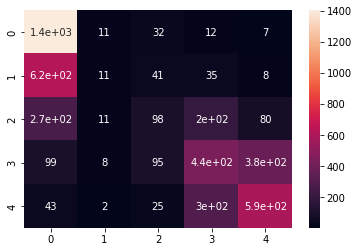

In [ ]:
sn.heatmap(confusion_matrix(labels, pred_labels, labels=[1,2,3,4,5]), annot=True)

In [ ]:
confusion_matrix(labels, pred_labels, labels=[1,2,3,4,5]).diagonal()/confusion_matrix(labels, pred_labels, labels=[1,2,3,4,5]).sum(axis=1)

array([0.95762133, 0.01538462, 0.14714715, 0.42773438, 0.61699895])

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=["note 1","note 2","note 3","note 4","note 5"], y=confusion_matrix(labels, pred_labels, labels=[1,2,3,4,5]).diagonal()/confusion_matrix(labels, pred_labels, labels=[1,2,3,4,5]).sum(axis=1),textposition='auto',)
],)
fig.update_layout(title_text='Accuracy en % par note de la librairie fastText supervisée')
fig.show()

## Export

In [ ]:
df[["bert_scores","vader_compound"]].to_csv("train_sentiment_score.csv")